In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("city_day.csv")   # <-- replace with your file name
print("✅ Data Loaded. Shape:", df.shape)

✅ Data Loaded. Shape: (29531, 16)


In [3]:
df = df.dropna() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [4]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["City_encoded"] = le.fit_transform(df_encoded["City"])

In [5]:
features = ["City_encoded", "PM2.5", "PM10", "NO", "NO2", "NOx", 
            "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]

X = df_encoded[features]
y_reg = df_encoded["AQI"]          
y_cls = df_encoded["AQI_Bucket"]   

In [6]:
X_train, X_test, y_train_reg, y_test_reg, y_train_cls, y_test_cls = train_test_split(
    X, y_reg, y_cls, test_size=0.2, random_state=42
)

In [7]:
regressor = RandomForestRegressor(random_state=42)
classifier = RandomForestClassifier(random_state=42)

regressor.fit(X_train, y_train_reg)
classifier.fit(X_train, y_train_cls)

RandomForestClassifier(random_state=42)

In [8]:
y_pred_reg = regressor.predict(X_test)
y_pred_cls = classifier.predict(X_test)

print("\n📌 Regression Results:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

print("\n📌 Classification Results:")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))


📌 Regression Results:
MAE: 13.807516025641025
R² Score: 0.9493581316614695

📌 Classification Results:
Accuracy: 0.8301282051282052


In [9]:
regressor.fit(X, y_reg)
classifier.fit(X, y_cls)

# 10. Predict for Full Dataset
df["AQI_Predicted"] = regressor.predict(X)
df["AQI_Bucket_Predicted"] = classifier.predict(X)


In [11]:
df.to_csv("aqi_india.csv", index=False)
print("✅ Predictions completed & saved as aqi_india.csv")

✅ Predictions completed & saved as aqi_india.csv


In [12]:
 import os
print("Saved file path:", os.path.abspath("aqi_india.csv"))


Saved file path: C:\Users\ANBU\Documents\aqi_india.csv


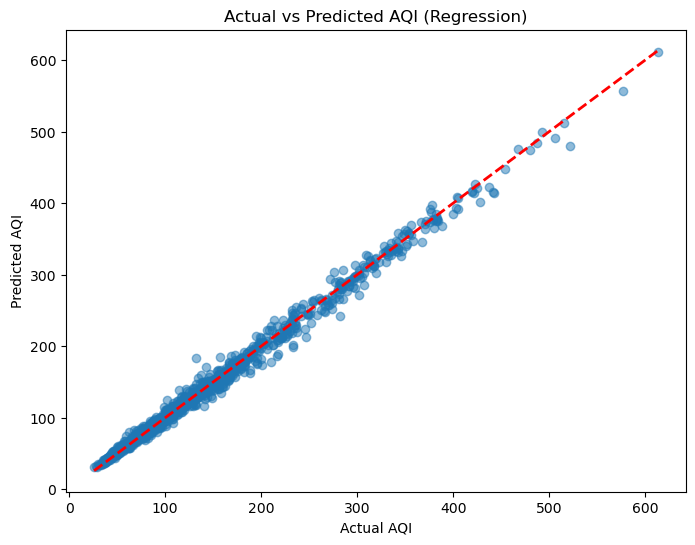

In [16]:
# Predict on test set
y_pred_reg = regressor.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Regression)")
plt.show()


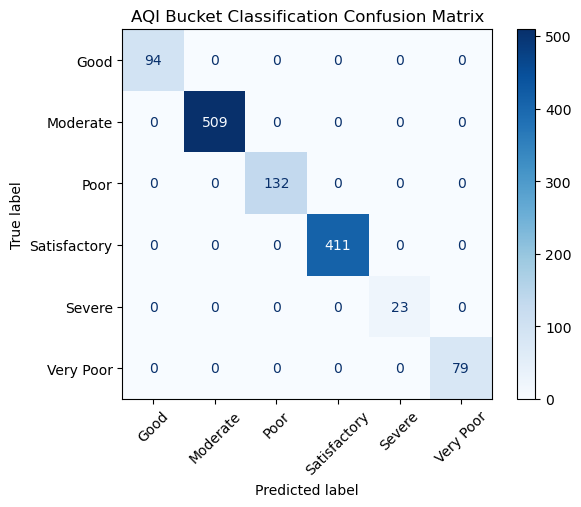

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classification predictions on test set
y_pred_cls = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("AQI Bucket Classification Confusion Matrix")
plt.show()


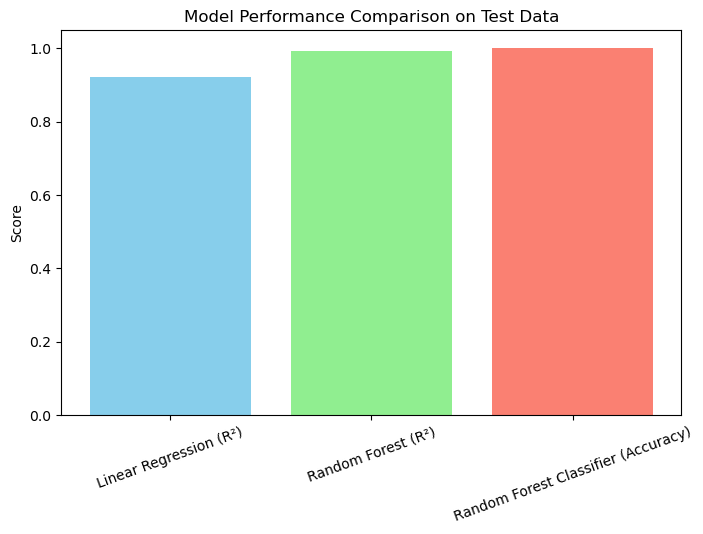

In [18]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

# --- Linear Regression (Regression) ---
lin_reg = LinearRegression().fit(X_train, y_train_reg)
r2_lin = r2_score(y_test_reg, lin_reg.predict(X_test))

# --- Random Forest Regressor (Regression) ---
r2_rf = r2_score(y_test_reg, regressor.predict(X_test))

# --- Random Forest Classifier (Classification) ---
acc_rf = accuracy_score(y_test_cls, y_pred_cls)

# --- Bar Chart for Model Comparison ---
plt.figure(figsize=(8,5))
plt.bar(
    ["Linear Regression (R²)", "Random Forest (R²)", "Random Forest Classifier (Accuracy)"],
    [r2_lin, r2_rf, acc_rf],
    color=["skyblue", "lightgreen", "salmon"]
)
plt.ylabel("Score")
plt.title("Model Performance Comparison on Test Data")
plt.xticks(rotation=20)
plt.show()
